<a href="https://colab.research.google.com/github/SelvamRaju/Computer-Vision-and-CNN/blob/main/Computer_Vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Domain : Botanical Research**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

In [19]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# **1. Import the data. Analyse the dimensions of the data. Visualise the data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

data = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Data/train/',target_size=(64,64),batch_size=4750,class_mode='categorical',subset="training")

Found 4767 images belonging to 12 classes.


In [5]:
X,y = next(data)

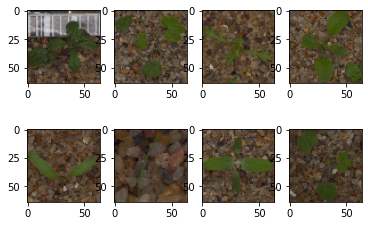

In [6]:
# Displaying some images from dataset
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(X[i])

In [7]:
# Displaying the categories
listing = os.listdir('/content/drive/MyDrive/Colab Notebooks/Data/train/')
print(f'Total no. of categories : {len(listing)}')
print ('Names of the categories : ')
images_count = [];
for imgFolder in listing:
  print(imgFolder)
  path=os.path.join('/content/drive/MyDrive/Colab Notebooks/Data/train/',imgFolder)
  number_of_images = len(os.listdir(path))
  images_count.append(number_of_images)

Total no. of categories : 12
Names of the categories : 
Scentless Mayweed
Maize
Fat Hen
Cleavers
Small-flowered Cranesbill
Common wheat
Shepherds Purse
Common Chickweed
Loose Silky-bent
Sugar beet
Black-grass
Charlock


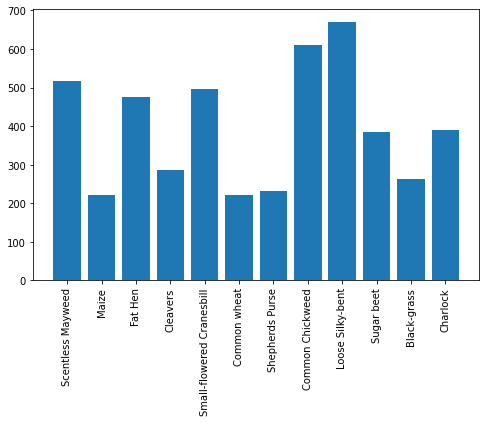

In [8]:
# Displaying the counts of image data under each category
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
ax.bar(listing,images_count)
plt.xticks(rotation = 90)
plt.show()

In [9]:
X.shape

(4750, 64, 64, 3)

In [10]:
y.shape

(4750, 12)

# **2. Design, train, tune and test the best AIML image classifier model using:**

• Supervised learning algorithms
• Neural networks
• CNN


## **Supervised Machine Learning**

Data is flattened or reshaped to apply Supervised Learning Methods

In [13]:
X_reshaped = X.reshape(4750, 12288) # 12288 is from the shape of X (i.e 64 * 64 * 3)  

In [14]:
y_reshaped = np.argmax(y,axis=1)

In [15]:
# Test/Train Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.33, random_state=42)

## SVM

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [25]:
print('SVM Train Score', svc.score(X_train,y_train))
print('SVM Test Score', svc.score(X_test,y_test))

SVM Train Score 0.8434946574481458
SVM Test Score 0.492984693877551


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
print('Logistic Regression Train Score ', lr.score(X_train,y_train))
print('Logistic Regression Test Score ', lr.score(X_test,y_test))

Logistic Regression Train Score  0.9157762413576367
Logistic Regression Test Score  0.47066326530612246


## Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [23]:
print('Naive Bayes Train Scores', mnb.score(X_train,y_train))
print('Naive Bayes Test Scores', mnb.score(X_test,y_test))

Naive Bayes Train Scores 0.3799497171590195
Naive Bayes Test Scores 0.3067602040816326


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
print('Decision Tree Train Score', dt.score(X_train,y_train))
print('Decision Tree Test Score', dt.score(X_test,y_test))

Decision Tree Train Score 1.0
Decision Tree Test Score 0.257015306122449


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
print('Random Forest Train Score', rf.score(X_train,y_train))
print('Random Forest Test Score', rf.score(X_test,y_test))

Random Forest Train Score 1.0
Random Forest Test Score 0.48596938775510207


## AdaBoosting / Adaptive Boosting 

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [32]:
print('AdaBoosting Train Score',ab.score(X_train,y_train))
print('AdaBoosting Test Score', ab.score(X_test,y_test))

AdaBoosting Train Score 0.3117536140791955
AdaBoosting Test Score 0.27933673469387754


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

In [ ]:
print('Gradient Boosting Train Score', gb.score(X_train,y_train))
print('Gradient Boosting Test Score', gb.score(X_test,y_test))

## XGBoost

In [ ]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

In [ ]:
print('XGBoost Train Score', xgb.score(X_train,y_train))
print('XGBoost Test Score', xgb.score(X_test,y_test))

Of all the above applied Supervised Learning Methods "XXXXXXXXX" gives the high accuracy 

# **3. Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case.**

# **4. Pickle the best performing model.**

# **5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class.**